# Assignment - 4

In [1]:
import math

In [2]:
import matplotlib.pyplot as plt

In [3]:
from lib.random import random
from lib.integrate import monte_carlo_sampler
from lib.array import arange

### Question 1

Part (i):
a = 65; m = 1021

In [4]:
a = random(0, 1, lcg_params=(65, 1021))

print(f"Random number from LCG with a=65, m=1021: {a}")


Random number from LCG with a=65, m=1021: 0.5210577864781953


In [5]:
arr = random(0, 1, size=5, lcg_params=(65, 1021))

print(f"Random sequence from LCG with a=65, m=1021: \n{round(arr, 3)}")

Random sequence from LCG with a=65, m=1021: 
([0.521, 0.869, 0.469, 0.495, 0.15], double)


Part (ii): a = 572; m = 16381

In [6]:
a = random(0, 1, lcg_params=(572, 16381))

print(f"Random number from LCG with a=572, m=16381: {a}")

Random number from LCG with a=572, m=16381: 0.5843965569865759


In [7]:
arr = random(0, 1, size=5, lcg_params=(572, 16381))

print(f"Random sequence from LCG with a=572, m=16381: \n{round(arr, 3)}")

Random sequence from LCG with a=572, m=16381: 
([0.584, 0.275, 0.203, 0.174, 0.448], double)


### Question 2

$$
f(x) = \int_{-\pi/2}^{\pi/2} \cos x dx
$$

The integral of cos(x) from -pi/2 to pi/2 is approximately 
2.000099612081998


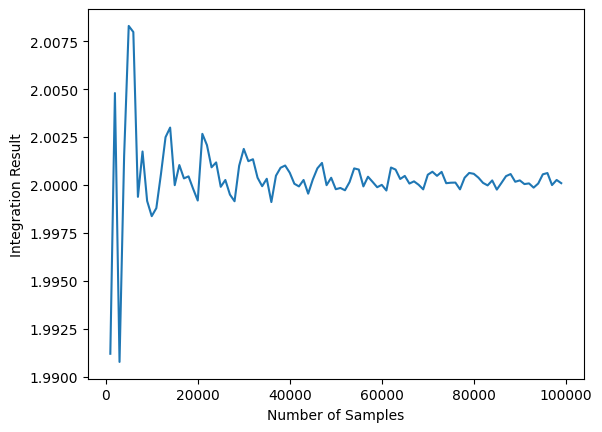

In [22]:
def question_2(x):
    return math.cos(x)

sample_range = (1000, 100_000)
sample_step = 1000

lower_bound = -math.pi/2
upper_bound = math.pi/2

rng_state = (16381, 572, 0, 10)

samples, results = monte_carlo_sampler(
    question_2,
    lower_bound,
    upper_bound,
    sample_range,
    sample_step,
    rng_state
)

print(f"The integral of cos(x) from -pi/2 to pi/2 is approximately \n{results[-1]}")

plt.plot(samples, results)
plt.xlabel("Number of Samples")
plt.ylabel("Integration Result")

plt.show()

### Question 3

Text(0.5, 1.0, 'Histogram of exponential PRNGs')

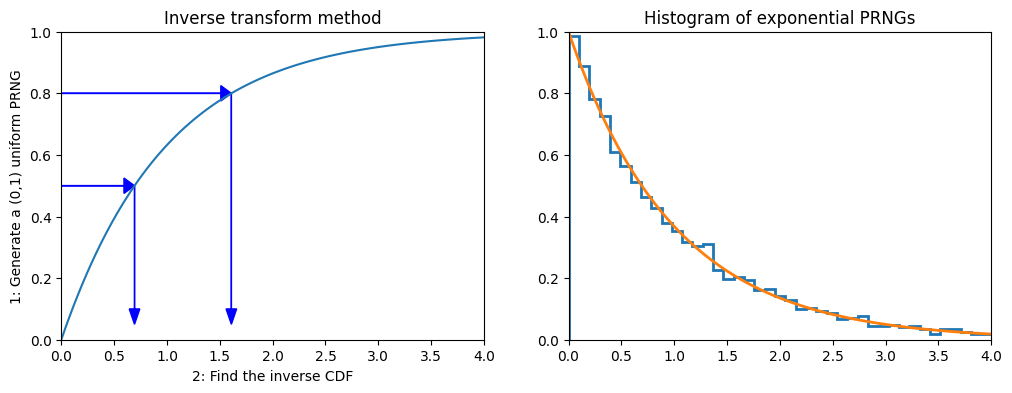

In [9]:
import numpy as np

def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd


import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

# with plt.xkcd():
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, expon_cdf(x))
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('2: Find the inverse CDF')
plt.title('Inverse transform method')

plt.subplot(122)
u = np.random.random(10000)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins=100, density=True,linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs')

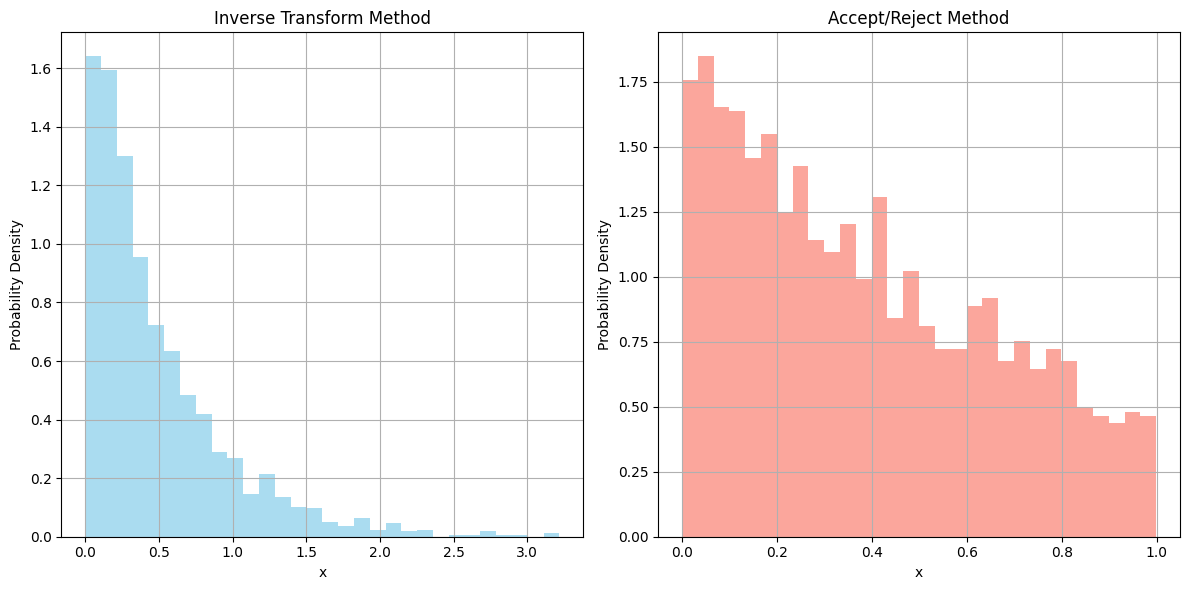

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Inverse Transform Method
def inverse_transform_exp(n):
    u = np.random.uniform(0, 1, n)
    return -np.log(1 - u) / 2

# Accept/Reject Method
def accept_reject_exp(n):
    samples = []
    while len(samples) < n:
        v = np.random.uniform(0, 1)  # Sample from q(x)
        u = np.random.uniform(0, 1)
        if u <= np.exp(-2 * v) / (2 - v):
            samples.append(v)
    return np.array(samples)

# Generate samples using both methods
n_samples = 2000
samples_inv_transform = inverse_transform_exp(n_samples)
samples_accept_reject = accept_reject_exp(n_samples)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_inv_transform, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(samples_accept_reject, bins=30, density=True, color='salmon', alpha=0.7)
plt.title('Accept/Reject Method')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)

plt.tight_layout()
plt.show()


### Question 4

In [11]:
import numpy as np

def f(x):
    return np.exp(-2*x) / (1 + x**2)

# Define the three sampling functions
def p1(x):
    return 0.5

def p2(x):
    return np.exp(-x)

def p3(x):
    return np.exp(-x/2) / (2 * (1 - np.exp(-1/2)))

# Number of samples
N = 10000

# Monte Carlo integration
def monte_carlo_integration(f, p, N):
    samples = np.random.uniform(0, 2, N)
    integrand = f(samples) / p(samples)
    return np.mean(integrand)

# Calculate the integral using each sampling function
result_p1 = monte_carlo_integration(f, p1, N)
result_p2 = monte_carlo_integration(f, p2, N)
result_p3 = monte_carlo_integration(f, p3, N)

print("Integral using p1(x) =", result_p1)
print("Integral using p2(x) =", result_p2)
print("Integral using p3(x) =", result_p3)


Integral using p1(x) = 0.39063180458073865
Integral using p2(x) = 0.30196201249367016
Integral using p3(x) = 0.18690733179339303
